# Objetivo

<span style="color: black; font-family: Arial; font-size: 20px;">
Investigar qual dos planos gera mais receita para a empresa, com o objetivo de ajustar o orçamento de publicidade.

## Carregue os dados:

In [10]:
# Carregando todas as bibliotecas
from scipy import stats as st
import numpy as np
import pandas as pd
from math import factorial
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Carregando arquivos de dados
df_calls = pd.read_csv(r"C:\Users\pedro\Documents\Dataframes projetos\megaline-income-analysis\megaline_calls.csv")
df_internet = pd.read_csv(r"C:\Users\pedro\Documents\Dataframes projetos\megaline-income-analysis\megaline_internet.csv")
df_messages = pd.read_csv(r"C:\Users\pedro\Documents\Dataframes projetos\megaline-income-analysis\megaline_messages.csv")
df_plans = pd.read_csv(r"C:\Users\pedro\Documents\Dataframes projetos\megaline-income-analysis\megaline_plans.csv")
df_users = pd.read_csv(r"C:\Users\pedro\Documents\Dataframes projetos\megaline-income-analysis\megaline_users.csv")

## Prepare os dados:

### Planos

In [14]:
# Imprimindo informações gerais/resumo sobre o DataFrame dos planos
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [15]:
# Imprimindo uma amostra de dados dos planos
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [16]:
# Inserindo a coluna de GB por mês
df_plans['gb_per_month_included'] = df_plans['mb_per_month_included'] / 1024
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


### Usuários

In [18]:
# Imprimindo informações gerais/resumo sobre o DataFrame dos usuários
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [19]:
# Imprimaindo uma amostra de dados dos usuários
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [20]:
# Alterando a coluna 'reg_date' para o formato DATETIME
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Chamadas

In [22]:
# Imprimindo informações gerais/resumo sobre o DataFrame das chamadas
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [23]:
# Imprimindo uma amostra de dados das chamadas
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [24]:
# Transformando a coluna 'call_date' para o formato DATETIME
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [25]:
# Arredondando a duração das chamadas
def arredondar(duration):
    arredonda=math.ceil(duration)
    return arredonda
df_calls['duration_rounded'] = df_calls['duration'].apply(arredondar)
df_calls.head()

,id,user_id,call_date,duration,duration_rounded
0,1000_93,1000,2018-12-27,8.52,9
1,1000_145,1000,2018-12-27,13.66,14
2,1000_247,1000,2018-12-27,14.48,15
3,1000_309,1000,2018-12-28,5.76,6
4,1000_380,1000,2018-12-30,4.22,5


### Mensagens

In [27]:
# Imprimindo informações gerais/resumo sobre o DataFrame das mensagens
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [28]:
# Imprimindo uma amostra dos dados das mensagens
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [29]:
# Transformando a coluna 'message_date' para o formato DATETIME
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Internet

In [31]:
# Imprimindo informações gerais/resumo sobre o DataFrame da internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [32]:
#  Imprimindo uma amostra de dados para o tráfego da internet
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [33]:
# Inserindo a coluna de GB por mês
df_internet['gb_used'] = df_internet['mb_used'] / 1024
df_internet.head()

,id,user_id,session_date,mb_used,gb_used
0,1000_13,1000,2018-12-29,89.86,0.087754
1,1000_204,1000,2018-12-31,0.00,0.000000
2,1000_379,1000,2018-12-28,660.40,0.644922
3,1000_413,1000,2018-12-26,270.99,0.264639
4,1000_442,1000,2018-12-27,880.22,0.859590


In [34]:
# Transformando a coluna 'session_date' para o formato DATETIME
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   gb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 4.0+ MB


## Análise dos dados:

<span style="color: blue; font-family: Arial; font-size: 20px;">
Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.

In [37]:
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month
monthly_calls = df_calls.groupby(['user_id', 'month'],as_index = False)['id'].count()
monthly_calls.rename({'id':'num_calls'},axis = 1, inplace = True)
monthly_calls.head()

,user_id,month,num_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


<span style="color: blue; font-family: Arial; font-size: 20px;">
Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.

In [39]:
monthly_duration = df_calls.groupby(['user_id', 'month'],as_index = False)['duration_rounded'].sum()
monthly_duration.head()

,user_id,month,duration_rounded
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426


<span style="color: blue; font-family: Arial; font-size: 20px;">
Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.

In [41]:
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month
monthly_messages = df_messages.groupby(['user_id', 'month'],as_index = False)['id'].count()
monthly_messages.rename({'id':'messages'},axis = 1, inplace = True)
monthly_messages.head()

,user_id,month,messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


<span style="color: blue; font-family: Arial; font-size: 20px;">
Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.

In [43]:
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month
monthly_internet = df_internet.groupby(['user_id', 'month'],as_index = False)['gb_used'].sum()
monthly_internet.head()

,user_id,month,gb_used
0,1000,12,1.856904
1,1001,8,6.756982
2,1001,9,13.002754
3,1001,10,21.807119
4,1001,11,18.070605


<span style="color: blue; font-family: Arial; font-size: 20px;">
Junte os dados de chamadas, minutos, mensagens e internet com base em user_id e month

In [45]:
li = [monthly_duration,monthly_internet,monthly_calls,monthly_messages]
merged_df = li[0]
for df in li [1:]:
    merged_df = pd.merge(merged_df, df, on=['user_id','month'], how='outer')
merged_df

,user_id,month,duration_rounded,gb_used,num_calls,messages
0,1000,12,124.0,1.856904,16.0,11.0
1,1001,8,182.0,6.756982,27.0,30.0
2,1001,9,315.0,13.002754,49.0,44.0
3,1001,10,393.0,21.807119,65.0,53.0
4,1001,11,426.0,18.070605,64.0,36.0
...,...,...,...,...,...,...
2288,1498,12,339.0,22.595400,39.0,NaN
2289,1499,9,346.0,12.680430,41.0,NaN
2290,1499,10,385.0,19.035576,53.0,NaN
2291,1499,11,308.0,16.419756,45.0,NaN


<span style="color: blue; font-family: Arial; font-size: 20px;">
Adicione as informações sobre os planos

In [47]:
df_users_filtered = df_users.drop(columns = ['churn_date'])
monthly_plans = pd.merge(merged_df, df_users_filtered, on='user_id', how='inner')
monthly_plans.head()

,user_id,month,duration_rounded,gb_used,num_calls,messages,first_name,last_name,age,city,reg_date,plan
0,1000,12,124.0,1.856904,16.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate
1,1001,8,182.0,6.756982,27.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf
2,1001,9,315.0,13.002754,49.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf
3,1001,10,393.0,21.807119,65.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf
4,1001,11,426.0,18.070605,64.0,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf


<span style="color: blue; font-family: Arial; font-size: 20px;">
Calcule a receita mensal para cada usuário: subtraia o limite gratuito do pacote do número total de chamadas, mensagens de texto e dados; multiplique o resultado pelo valor do plano; adicione o preço mensal dependendo do plano

In [49]:
# Adicionando os preços de cada plano
surf_monthly_charge = 20
surf_monthly_minutes = 500
surf_monthly_messages = 50
surf_monthly_data = 15
surf_call_charge = 0.03
surf_message_charge = 0.03
surf_data_charge = 10

ultimate_monthly_charge = 70
ultimate_monthly_minutes = 3000
ultimate_monthly_messages = 1000
ultimate_monthly_data = 30
ultimate_call_charge = 0.01
ultimate_message_charge = 0.01
ultimate_data_charge = 7

In [50]:
# Adicionando os custos por chamada
def charge_calls (row):
    plan=row['plan']
    min_used=row['duration_rounded']
    if plan == 'surf':
        if min_used > 500:
            charge = min_used - 500
        else:
            charge = 0
    if plan == 'ultimate':
        if min_used > 3000:
            charge = min_used - 3000
        else:
            charge = 0
    return charge

In [51]:
monthly_plans['charge_calls'] = monthly_plans.apply(charge_calls, axis=1)
monthly_plans.head()

,user_id,month,duration_rounded,gb_used,num_calls,messages,first_name,last_name,age,city,reg_date,plan,charge_calls
0,1000,12,124.0,1.856904,16.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0.0
1,1001,8,182.0,6.756982,27.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0.0
2,1001,9,315.0,13.002754,49.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0.0
3,1001,10,393.0,21.807119,65.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0.0
4,1001,11,426.0,18.070605,64.0,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0.0


In [52]:
# Adicionando os custos de internet
def charge_internet (row):
    plan=row['plan']
    gb_used=row['gb_used']
    if plan == 'surf':
        if gb_used > 15:
            charge = gb_used - 15
        else:
            charge = 0
    if plan == 'ultimate':
        if gb_used > 30:
            charge = gb_used - 30
        else:
            charge = 0
    return charge

In [53]:
monthly_plans['charge_internet'] = monthly_plans.apply(charge_internet, axis=1)
monthly_plans.head()

,user_id,month,duration_rounded,gb_used,num_calls,messages,first_name,last_name,age,city,reg_date,plan,charge_calls,charge_internet
0,1000,12,124.0,1.856904,16.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0.0,0.000000
1,1001,8,182.0,6.756982,27.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0.0,0.000000
2,1001,9,315.0,13.002754,49.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0.0,0.000000
3,1001,10,393.0,21.807119,65.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0.0,6.807119
4,1001,11,426.0,18.070605,64.0,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0.0,3.070605


In [54]:
# Adicionando os custos por mensangens
def charge_messages (row):
    plan=row['plan']
    messages_used=row['messages']
    if plan == 'surf':
        if messages_used > 50:
            charge = messages_used - 50
        else:
            charge = 0
    if plan == 'ultimate':
        if messages_used > 1000:
            charge = messages_used - 1000
        else:
            charge = 0
    return charge

In [55]:
monthly_plans['charge_messages'] = monthly_plans.apply(charge_messages, axis=1)
monthly_plans.head()

,user_id,month,duration_rounded,gb_used,num_calls,messages,first_name,last_name,age,city,reg_date,plan,charge_calls,charge_internet,charge_messages
0,1000,12,124.0,1.856904,16.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0.0,0.000000,0.0
1,1001,8,182.0,6.756982,27.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0.0,0.000000,0.0
2,1001,9,315.0,13.002754,49.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0.0,0.000000,0.0
3,1001,10,393.0,21.807119,65.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0.0,6.807119,3.0
4,1001,11,426.0,18.070605,64.0,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0.0,3.070605,0.0


In [56]:
# Calculando a receita
def monthly_revenue (row):
    plan = row['plan']
    charge_calls = row['charge_calls']
    charge_messages = row['charge_messages']
    charge_internet = row['charge_internet']
    if plan == 'surf':
        revenue = surf_monthly_charge + ((charge_calls * surf_call_charge)+(charge_messages * surf_message_charge)+(charge_internet * surf_data_charge))
    else:
        revenue = ultimate_monthly_charge + ((charge_calls * ultimate_call_charge)+(charge_messages * ultimate_message_charge)+(charge_internet * ultimate_data_charge))
    return revenue

In [57]:
# Adicionando a receita por usuário
monthly_plans['monthly_revenue'] = monthly_plans.apply(monthly_revenue, axis=1)
monthly_plans.head()

,user_id,month,duration_rounded,gb_used,num_calls,messages,first_name,last_name,age,city,reg_date,plan,charge_calls,charge_internet,charge_messages,monthly_revenue
0,1000,12,124.0,1.856904,16.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0.0,0.000000,0.0,70.000000
1,1001,8,182.0,6.756982,27.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0.0,0.000000,0.0,20.000000
2,1001,9,315.0,13.002754,49.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0.0,0.000000,0.0,20.000000
3,1001,10,393.0,21.807119,65.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0.0,6.807119,3.0,88.161191
4,1001,11,426.0,18.070605,64.0,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0.0,3.070605,0.0,50.706055


In [141]:
monthly_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           2293 non-null   int64         
 1   month             2293 non-null   int32         
 2   duration_rounded  2258 non-null   float64       
 3   gb_used           2277 non-null   float64       
 4   num_calls         2258 non-null   float64       
 5   messages          1806 non-null   float64       
 6   first_name        2293 non-null   object        
 7   last_name         2293 non-null   object        
 8   age               2293 non-null   int64         
 9   city              2293 non-null   object        
 10  reg_date          2293 non-null   datetime64[ns]
 11  plan              2293 non-null   object        
 12  charge_calls      2293 non-null   float64       
 13  charge_internet   2293 non-null   float64       
 14  charge_messages   2293 n

In [139]:
monthly_plans.to_csv(r"C:\Users\pedro\Documents\Dataframes projetos\megaline-income-analysis\monthly_plans.csv")

<span style="color: blue; font-family: Arial; font-size: 20px;">
Compare a duração média das chamadas de cada plano para cada mês.

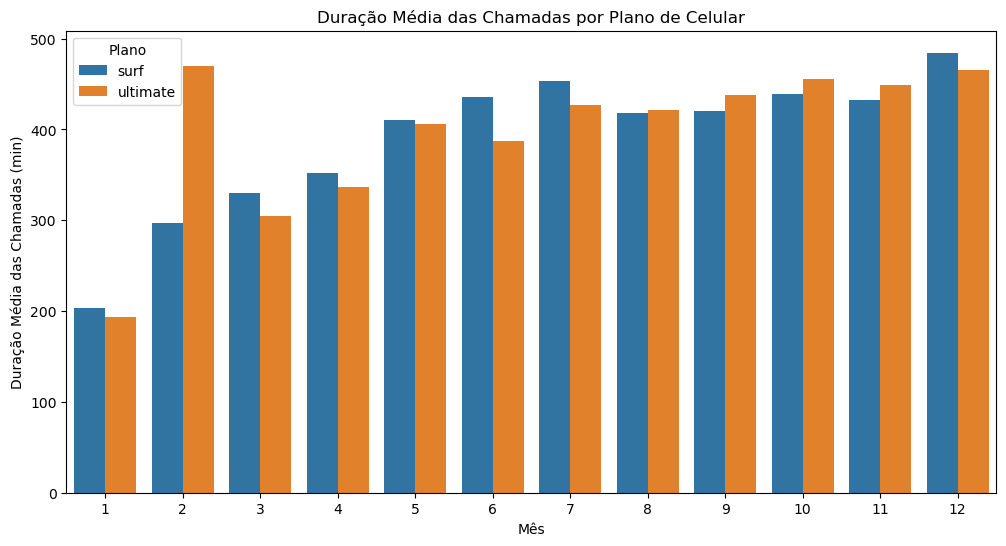

In [59]:
mean_duration = monthly_plans.groupby(['plan', 'month'])['duration_rounded'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='duration_rounded', hue='plan', data=mean_duration)
plt.title('Duração Média das Chamadas por Plano de Celular')
plt.xlabel('Mês')
plt.ylabel('Duração Média das Chamadas (min)')
plt.legend(title = 'Plano')
plt.show()

<span style="color: blue; font-family: Arial; font-size: 20px;">
Compare o número de minutos que os usuários de cada plano necessitam a cada mês.

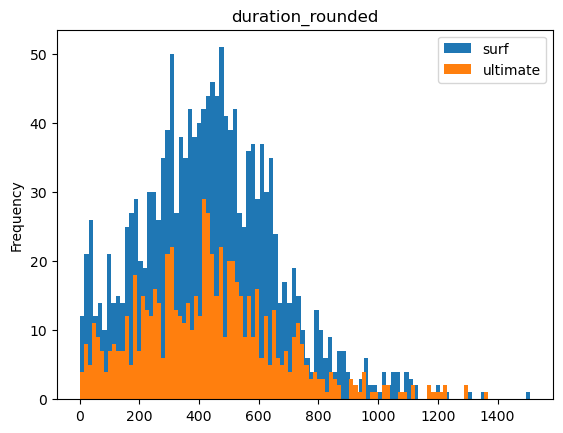

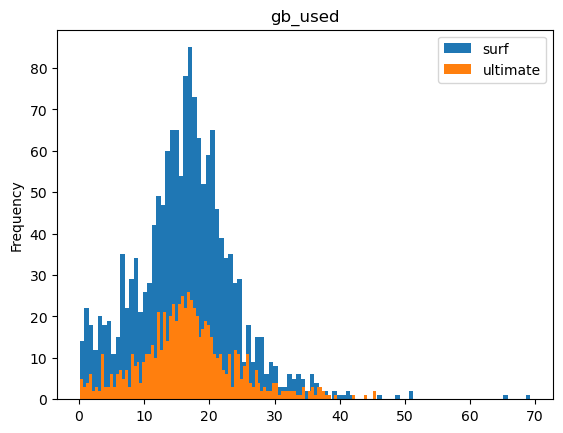

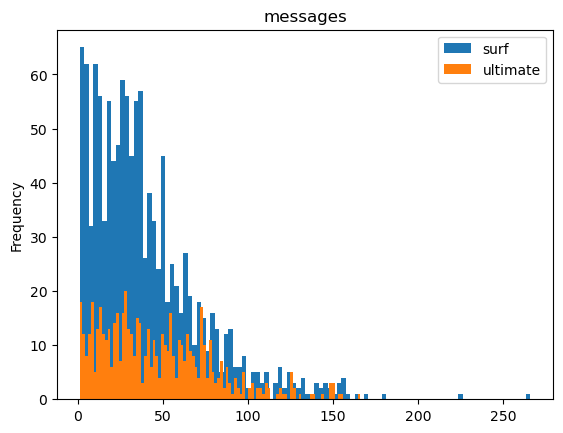

In [61]:
variables = ['duration_rounded', 'gb_used', 'messages']
plans = ['surf', 'ultimate']
for column in variables:
    for tariff in plans:
        monthly_plans[monthly_plans['plan'] == tariff][column].plot(kind='hist', bins=100)
    plt.title(column)
    plt.legend(plans)
    plt.show()

<span style="color: blue; font-family: Arial; font-size: 20px;">
Calcule a média e a variância da duração mensal das chamadas

In [63]:
mean_duration = monthly_plans.groupby(['month'])['duration_rounded'].mean()
print(mean_duration.head(12))
print()
variance = np.var(mean_duration)
print(variance)

month
1     196.666667
2     366.333333
3     321.171429
4     347.197183
5     409.125000
6     420.361702
7     444.944134
8     418.956522
9     425.942238
10    443.988131
11    437.570720
12    478.269565
Name: duration_rounded, dtype: float64

5319.6395736421555


<Axes: ylabel='duration_rounded'>

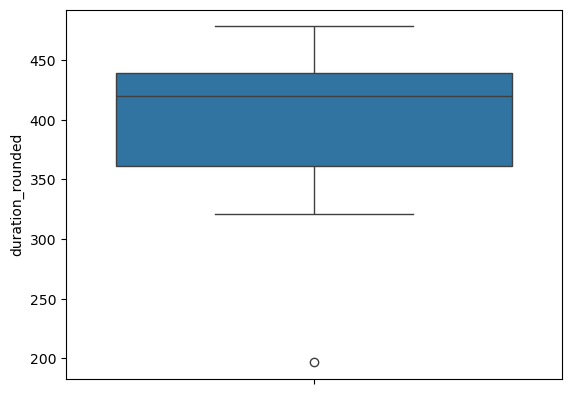

In [64]:
# Fazendo um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas
sns.boxplot(mean_duration)

<span style="color: black; font-family: Arial; font-size: 20px;">
Usuários do plano Surf fazem muito mais chamadas do que os usuários do plano Ultimate

<span style="color: blue; font-family: Arial; font-size: 20px;">
Compare o número de mensagens que os usuários de cada plano costumam enviar a cada mês

In [146]:
monthly_messages = monthly_plans.groupby(['plan', 'month'],as_index = False)['messages'].sum()
monthly_messages.head()

,plan,month,messages
0,surf,1,21.0
1,surf,2,108.0
2,surf,3,351.0
3,surf,4,870.0
4,surf,5,1849.0


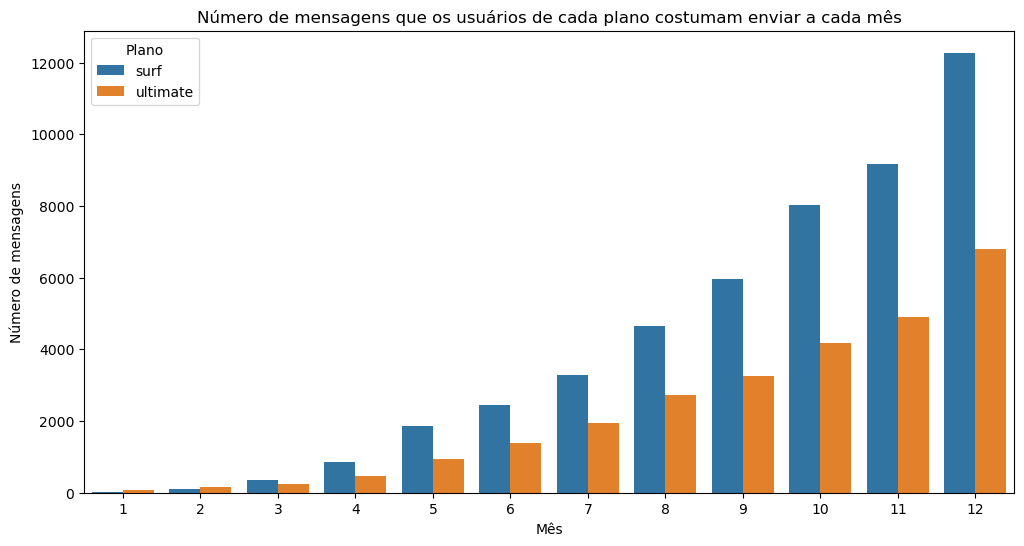

In [68]:
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='messages', hue='plan', data=monthly_messages)
plt.title('Número de mensagens que os usuários de cada plano costumam enviar a cada mês')
plt.xlabel('Mês')
plt.ylabel('Número de mensagens')
plt.legend(title = 'Plano')
plt.show()

<span style="color: black; font-family: Arial; font-size: 20px;">
Usuários do plano Surf mandam mais mensagens a cada mês do que os usuários do plano Ultimate

<span style="color: blue; font-family: Arial; font-size: 20px;">
Compare a quantidade de tráfego de internet consumido pelos usuários por plano

In [71]:
monthly_net = monthly_plans.groupby(['plan', 'month'],as_index = False)['gb_used'].sum()
monthly_net.head()

,plan,month,gb_used
0,surf,1,9.521211
1,surf,2,107.040615
2,surf,3,299.751094
3,surf,4,585.166162
4,surf,5,1047.948564


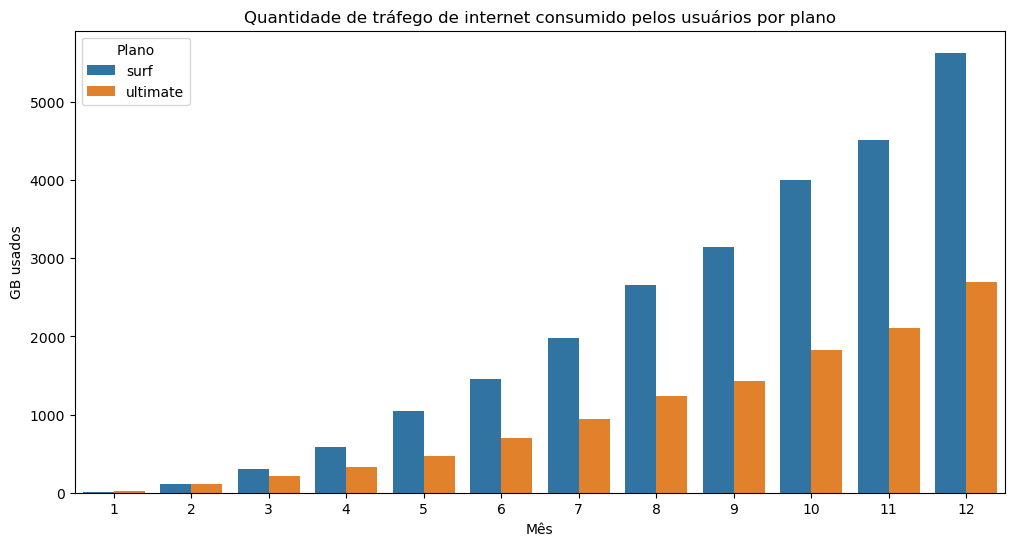

In [72]:
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='gb_used', hue='plan', data=monthly_net)
plt.title('Quantidade de tráfego de internet consumido pelos usuários por plano')
plt.xlabel('Mês')
plt.ylabel('GB usados')
plt.legend(title = 'Plano')
plt.show()

<span style="color: black; font-family: Arial; font-size: 20px;">
Usuários do plano Surf consomem mais internet do que os usuários do plano Ultimate

<span style="color: blue; font-family: Arial; font-size: 20px;">
Estude o comportamento das receitas dos planos

In [75]:
monthly_revenue = monthly_plans.groupby(['plan', 'month'],as_index = False)['monthly_revenue'].sum()
monthly_revenue.head()

,plan,month,monthly_revenue
0,surf,1,40.000000
1,surf,2,298.295000
2,surf,3,1005.786133
3,surf,4,1951.669258
4,surf,5,3521.941387


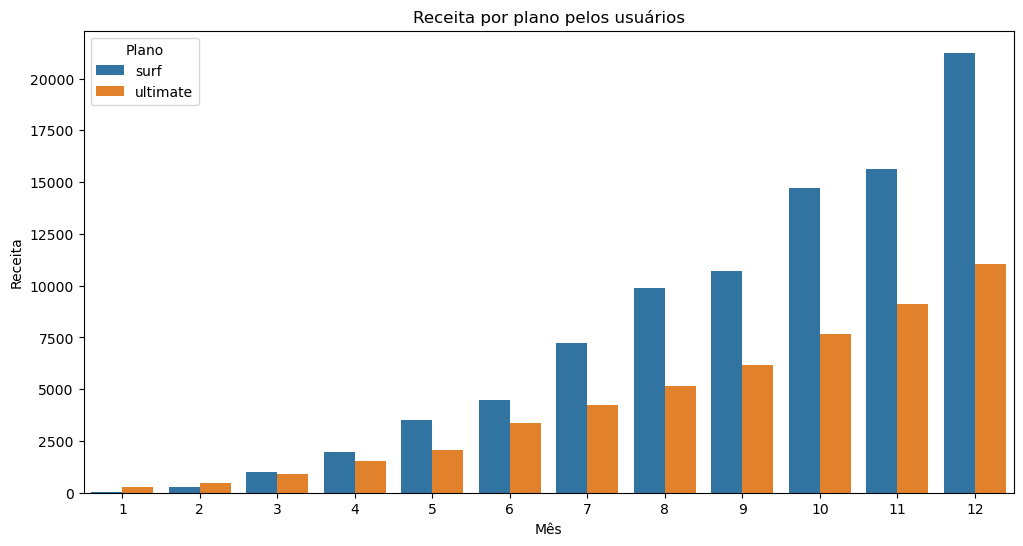

In [76]:
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='monthly_revenue', hue='plan', data=monthly_revenue)
plt.title('Receita por plano pelos usuários')
plt.xlabel('Mês')
plt.ylabel('Receita')
plt.legend(title = 'Plano')
plt.show()

<span style="color: black; font-family: Arial; font-size: 20px;">
O plano Surf gera mais receita ao longo do tempo do que o plano Ultimate

## Teste hipóteses estatísticas:

<span style="color: blue; font-family: Arial; font-size: 20px;">
Teste a hipótese de que a receita média dos usuários dos planos Ultimate e Surf são diferentes.

In [80]:
# H0: A média da receita dos usuários dos planos Surf e Ultimate é igual
# HA: A média da receita dos usuários dos planos Surf e Ultimate é diferente.

In [81]:
# Testando as hipóteses
surf_revenue = monthly_revenue.loc[monthly_revenue['plan'] == 'surf']
ultimate_revenue = monthly_revenue.loc[monthly_revenue['plan'] == 'ultimate']

alpha=0.05

if surf_revenue['monthly_revenue'].var() == ultimate_revenue['monthly_revenue'].var():
    results = st.ttest_ind(surf_revenue['monthly_revenue'], ultimate_revenue['monthly_revenue'],equal_var = True)
else:
    results = st.ttest_ind(surf_revenue['monthly_revenue'], ultimate_revenue['monthly_revenue'],equal_var = False)

print('valor-p: ', results.pvalue)

if results.pvalue < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

valor-p:  0.1695691992711702
Não podemos rejeitar a hipótese nula


<span style="color: blue; font-family: Arial; font-size: 20px;">
Teste a hipótese de que a receita média dos usuários da área de NY-NJ difere dos usuários das demais regiões

In [83]:
# H0: A receita média dos usuários da região NY-NJ é igual à dos usuários das demais regiões.
# HA: A receita média dos usuários da região NY-NJ é diferente da dos demais.

In [84]:
# Testando as hipóteses
NYNJ_revenue = monthly_plans.loc[monthly_plans['city'].str.contains('NY-NJ')]
else_revenue = monthly_plans.loc[~monthly_plans['city'].str.contains('NY-NJ')]

alpha=0.05

if NYNJ_revenue['monthly_revenue'].var() == else_revenue['monthly_revenue'].var():
    results = st.ttest_ind(NYNJ_revenue['monthly_revenue'], else_revenue['monthly_revenue'],equal_var = True)
else:
    results = st.ttest_ind(NYNJ_revenue['monthly_revenue'], else_revenue['monthly_revenue'],equal_var = False)

print('valor-p: ', results.pvalue)

if results.pvalue < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")


valor-p:  0.020128295172528086
Rejeitamos a hipótese nula


## Conclusões e recomendações

<span style="color: black; font-family: Arial; font-size: 20px;">

A análise revelou que, embora os usuários do **plano Surf** façam mais chamadas, enviem mais mensagens, consumam mais internet e aparentem gerar mais receita bruta ao longo do tempo, o **teste estatístico não mostrou diferença significativa na receita média** entre os planos Surf e Ultimate (valor-p ≈ 16%).  
Isso indica que, apesar do comportamento mais intenso de uso no plano Surf, a receita média por usuário não difere de forma estatisticamente comprovada em relação ao plano Ultimate.  

Por outro lado, a análise geográfica mostrou um resultado relevante: os usuários da região **NY-NJ apresentam receita média diferente** em comparação com usuários de outras regiões (valor-p ≈ 20%). Esse achado sugere uma oportunidade de segmentação regional.

1. **Segmentação por Região**: desenvolver campanhas personalizadas para a área de NY-NJ, aproveitando o potencial de receita identificado na análise.
2. **Promoções para o Plano Ultimate**: considerando que o uso no Surf é mais intenso, mas não gera receita média estatisticamente maior, pode ser interessante criar incentivos para aumentar a adesão ao plano Ultimate, destacando benefícios de custo-benefício para usuários de alto consumo.
3. **Foco em Serviços de Valor Adicionado**: já que o consumo de dados e mensagens é maior no plano Surf, estratégias de monetização adicional (como pacotes premium de internet ou vantagens exclusivas) podem ser exploradas para aumentar a receita nesse segmento.
4. **Análises Futuras**: investigar se diferenças na duração de contrato, churn ou perfis demográficos afetam a rentabilidade dos planos e regiões, de forma a orientar decisões de marketing mais assertivas.

---